# Dataset

The KDD Cup ‘99 dataset (http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) was created by processing the tcpdump portions of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset, created by MIT Lincoln Lab. The artificial data was generated using a closed network and hand-injected attacks to produce a large number of different types of attack with normal activity in the background. As the initial goal was to produce a large training set for supervised learning algorithms, there is a large proportion (80.1%) of abnormal data which is unrealistic in real world, and inappropriate for unsupervised anomaly detection which aims at detecting ‘abnormal’ data, ie

* qualitatively different from normal data.
* in large minority among the observations.

KDD Data set is transformed into two different data sets: SA and SF.
SA is obtained by simply selecting all the normal data, and a small proportion of abnormal data to gives an anomaly proportion of 1%.
SF is obtained as in [2] by simply picking up the data whose attribute logged_in is positive, thus focusing on the intrusion attack, which gives a proportion of 0.3% of attack.
http and smtp are two subsets of SF corresponding with third feature equal to ‘http’ (resp. to ‘smtp’)

The dataset can be extracted from `sklearn.datasets.fetch_kddcup99`. The details is avaialble at http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html

In [10]:
from sklearn import datasets
import pandas as pd

In [11]:
random_state=2
data_kdd99= datasets.fetch_kddcup99(subset=None, percent10=True,
                                 random_state=random_state)

extraction done


In [14]:
data_kdd99

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ..., 
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object)}

In [15]:
Y = pd.DataFrame(data_kdd99.target)
Y[0].unique()


array([b'normal.', b'buffer_overflow.', b'loadmodule.', b'perl.',
       b'neptune.', b'smurf.', b'guess_passwd.', b'pod.', b'teardrop.',
       b'portsweep.', b'ipsweep.', b'land.', b'ftp_write.', b'back.',
       b'imap.', b'satan.', b'phf.', b'nmap.', b'multihop.',
       b'warezmaster.', b'warezclient.', b'spy.', b'rootkit.'], dtype=object)

In [16]:
Y.describe()

,0
count,494021
unique,23
top,b'smurf.'
freq,280790


In [17]:
Y[0].astype('category')

0         b'normal.'
1         b'normal.'
2         b'normal.'
3         b'normal.'
4         b'normal.'
5         b'normal.'
6         b'normal.'
7         b'normal.'
8         b'normal.'
9         b'normal.'
10        b'normal.'
11        b'normal.'
12        b'normal.'
13        b'normal.'
14        b'normal.'
15        b'normal.'
16        b'normal.'
17        b'normal.'
18        b'normal.'
19        b'normal.'
20        b'normal.'
21        b'normal.'
22        b'normal.'
23        b'normal.'
24        b'normal.'
25        b'normal.'
26        b'normal.'
27        b'normal.'
28        b'normal.'
29        b'normal.'
             ...    
493991    b'normal.'
493992    b'normal.'
493993    b'normal.'
493994    b'normal.'
493995    b'normal.'
493996    b'normal.'
493997    b'normal.'
493998    b'normal.'
493999    b'normal.'
494000    b'normal.'
494001    b'normal.'
494002    b'normal.'
494003    b'normal.'
494004    b'normal.'
494005    b'normal.'
494006    b'normal.'
494007    b'n

In [18]:
Y[0].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: 0, dtype: int64

In [44]:
X=pd.DataFrame(data_kdd99.data)

In [45]:
data_cmb = X
data_cmb['target'] = Y[0]

In [53]:
print(data_cmb[1].value_counts())
print("\n")
print(data_cmb[2].value_counts())
print("\n")
print(data_cmb[3].value_counts())

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: 1, dtype: int64


b'ecr_i'          281400
b'private'        110893
b'http'            64293
b'smtp'             9723
b'other'            7237
b'domain_u'         5863
b'ftp_data'         4721
b'eco_i'            1642
b'ftp'               798
b'finger'            670
b'urp_i'             538
b'telnet'            513
b'ntp_u'             380
b'auth'              328
b'pop_3'             202
b'time'              157
b'csnet_ns'          126
b'remote_job'        120
b'gopher'            117
b'imap4'             117
b'discard'           116
b'domain'            116
b'systat'            115
b'iso_tsap'          115
b'shell'             112
b'echo'              112
b'rje'               111
b'whois'             110
b'sql_net'           110
b'printer'           109
                   ...  
b'vmnet'             106
b'uucp_path'         106
b'uucp'              106
b'bgp'               106
b'supdup'            105
b'nnsp'              1

In [47]:
data_cmb.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,target
count,494021,494021,494021,494021,494021,494021,494021,494021,494021,494021,...,494021,494021.0,494021.0,494021.0,494021.0,494021.0,494021.0,494021.0,494021.0,494021
unique,2495,3,66,11,3300,10725,2,3,4,22,...,256,101.0,101.0,101.0,65.0,100.0,72.0,101.0,101.0,23
top,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
freq,481671,283602,281400,378440,228035,408258,493999,492783,494017,490829,...,337746,347828.0,347031.0,288883.0,441889.0,399810.0,400945.0,458792.0,459805.0,280790


In [54]:
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
             "urgent","hot","num_failed_logins","logged_in","num_compromised",
             "root_shell","su_attempted","num_root","num_file_creations",
             "num_shells","num_access_files","num_outbound_cmds",
             "is_hot_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [55]:
data_cmb.columns = col_names

In [58]:
data_cmb.to_csv(path_or_buf="dataset/kdd99_10_percent.dump.csv",index=False)

In [5]:
import pickle
pickle.dump(data_cmb, open("dataset/kdd99_10_percent.dump.pkl","wb"))

## Obtain data directly

In [59]:
import urllib.request
data_file = "dataset/kddcup.data_10_percent.gz"
f = urllib.request.urlretrieve ("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "dataset/kddcup.data_10_percent.gz")
df = pd.read_csv(data_file, compression='gzip', header=-1, sep=',', quotechar='"')

# Data Exploration

The detailed explaination about the features is available at (http://kdd.ics.uci.edu/databases/kddcup99/task.html)

In [6]:
import pandas as pd
import pickle
data_cmb = pd.read_csv("dataset/kdd99_10_percent.dump.csv")
data_cmb = pickle.load(open("dataset/kdd99_10_percent.dump.pkl","rb"))

In [46]:
dsummary=data_cmb.groupby("target").describe()


In [99]:
pd.set_option('display.max_rows', 500)
dsummary





count  diff_srv_rate     dst_bytes  \
target                                                                  
b'back.'            count    2203.000000    2203.000000  2.203000e+03   
                    mean        3.381298       0.002320  8.232650e+03   
                    std         1.651756       0.035177  6.162318e+02   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         2.000000       0.000000  8.314000e+03   
                    50%         3.000000       0.000000  8.314000e+03   
                    75%         4.000000       0.000000  8.314000e+03   
                    max        19.000000       0.670000  8.315000e+03   
b'buffer_overflow.' count      30.000000      30.000000  3.000000e+01   
                    mean        9.100000       0.038000  6.339833e+03   
                    std        30.667685       0.182575  1.244066e+04   
                    min         1.000000       0.000000  6.980000e+02   
                    25%         1.000000       0.000000  2.745000e+03   
                    50%         1.000000       0.000000  3.815500e+03   
                    75%         2.000000       0.000000  5.020000e+03   
                    max       151.000000       1.000000  7.052900e+04   
b'ftp_write.'       count       8.000000       8.000000  8.000000e+00   
                    mean        1.000000       0.000000  5.382250e+03   
                    std         0.000000       0.000000  1.379374e+04   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  3.750000e+00   
                    50%         1.000000       0.000000  2.270000e+02   
                    75%         1.000000       0.000000  1.014000e+03   
                    max         1.000000       0.000000  3.944500e+04   
b'guess_passwd.'    count      53.000000      53.000000  5.300000e+01   
                    mean        1.528302       0.000000  2.161887e+02   
                    std         0.540789       0.000000  2.575023e+02   
                    min         1.000000       0.000000  1.790000e+02   
                    25%         1.000000       0.000000  1.790000e+02   
                    50%         2.000000       0.000000  1.790000e+02   
                    75%         2.000000       0.000000  1.790000e+02   
                    max         3.000000       0.000000  2.053000e+03   
b'imap.'            count      12.000000      12.000000  1.200000e+01   
                    mean        2.000000       0.000000  5.494867e+04   
                    std         1.206045       0.000000  1.871584e+05   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  0.000000e+00   
                    50%         1.500000       0.000000  0.000000e+00   
                    75%         3.000000       0.000000  4.050000e+01   
                    max         4.000000       0.000000  6.491860e+05   
b'ipsweep.'         count    1247.000000    1247.000000  1.247000e+03   
                    mean        1.000000       0.000000  2.718524e-01   
                    std         0.000000       0.000000  5.090579e+00   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  0.000000e+00   
                    50%         1.000000       0.000000  0.000000e+00   
                    75%         1.000000       0.000000  0.000000e+00   
                    max         1.000000       0.000000  1.330000e+02   
b'land.'            count      21.000000      21.000000  2.100000e+01   
                    mean        4.761905       0.051429  0.000000e+00   
                    std        16.786616       0.218043  0.000000e+00   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  0.000000e+00   
                    

In [78]:
"various precisions: {0:6.2f} or {0:2.3f}".format(dsummary.loc["b'normal.'",'count']['count']/data_cmb.shape[0]*100) 


'various precisions:  19.69 or 19.691'

In [83]:
print("total number of the record is %s" % '{:,}'.format((data_cmb.shape[0])))
print("records for normal type {:,}".format(dsummary.loc["b'normal.'",'count']['count']))
print("ratio is: {0:2.3f}%".format(dsummary.loc["b'normal.'",'count']['count']/data_cmb.shape[0]*100) )


total number of the record is 494,021
records for normal type 97,278.0
ratio is: 19.691%


Noted this small ratio of normal dataset may suggset an un-really high attacking rate which is unlikely to happpen in the real situation. 



In [85]:
dsummary

count  diff_srv_rate     dst_bytes  \
target                                                                  
b'back.'            count    2203.000000    2203.000000  2.203000e+03   
                    mean        3.381298       0.002320  8.232650e+03   
                    std         1.651756       0.035177  6.162318e+02   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         2.000000       0.000000  8.314000e+03   
                    50%         3.000000       0.000000  8.314000e+03   
                    75%         4.000000       0.000000  8.314000e+03   
                    max        19.000000       0.670000  8.315000e+03   
b'buffer_overflow.' count      30.000000      30.000000  3.000000e+01   
                    mean        9.100000       0.038000  6.339833e+03   
                    std        30.667685       0.182575  1.244066e+04   
                    min         1.000000       0.000000  6.980000e+02   
                    25%         1.000000       0.000000  2.745000e+03   
                    50%         1.000000       0.000000  3.815500e+03   
                    75%         2.000000       0.000000  5.020000e+03   
                    max       151.000000       1.000000  7.052900e+04   
b'ftp_write.'       count       8.000000       8.000000  8.000000e+00   
                    mean        1.000000       0.000000  5.382250e+03   
                    std         0.000000       0.000000  1.379374e+04   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  3.750000e+00   
                    50%         1.000000       0.000000  2.270000e+02   
                    75%         1.000000       0.000000  1.014000e+03   
                    max         1.000000       0.000000  3.944500e+04   
b'guess_passwd.'    count      53.000000      53.000000  5.300000e+01   
                    mean        1.528302       0.000000  2.161887e+02   
                    std         0.540789       0.000000  2.575023e+02   
                    min         1.000000       0.000000  1.790000e+02   
                    25%         1.000000       0.000000  1.790000e+02   
                    50%         2.000000       0.000000  1.790000e+02   
                    75%         2.000000       0.000000  1.790000e+02   
                    max         3.000000       0.000000  2.053000e+03   
b'imap.'            count      12.000000      12.000000  1.200000e+01   
                    mean        2.000000       0.000000  5.494867e+04   
                    std         1.206045       0.000000  1.871584e+05   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  0.000000e+00   
                    50%         1.500000       0.000000  0.000000e+00   
                    75%         3.000000       0.000000  4.050000e+01   
                    max         4.000000       0.000000  6.491860e+05   
b'ipsweep.'         count    1247.000000    1247.000000  1.247000e+03   
                    mean        1.000000       0.000000  2.718524e-01   
                    std         0.000000       0.000000  5.090579e+00   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  0.000000e+00   
                    50%         1.000000       0.000000  0.000000e+00   
                    75%         1.000000       0.000000  0.000000e+00   
                    max         1.000000       0.000000  1.330000e+02   
b'land.'            count      21.000000      21.000000  2.100000e+01   
                    mean        4.761905       0.051429  0.000000e+00   
                    std        16.786616       0.218043  0.000000e+00   
                    min         1.000000       0.000000  0.000000e+00   
                    25%         1.000000       0.000000  0.000000e+00   
                    

target
b'back.'               Axes(0.125,0.125;0.775x0.755)
b'buffer_overflow.'    Axes(0.125,0.125;0.775x0.755)
b'ftp_write.'          Axes(0.125,0.125;0.775x0.755)
b'guess_passwd.'       Axes(0.125,0.125;0.775x0.755)
b'imap.'               Axes(0.125,0.125;0.775x0.755)
b'ipsweep.'            Axes(0.125,0.125;0.775x0.755)
b'land.'               Axes(0.125,0.125;0.775x0.755)
b'loadmodule.'         Axes(0.125,0.125;0.775x0.755)
b'multihop.'           Axes(0.125,0.125;0.775x0.755)
b'neptune.'            Axes(0.125,0.125;0.775x0.755)
b'nmap.'               Axes(0.125,0.125;0.775x0.755)
b'normal.'             Axes(0.125,0.125;0.775x0.755)
b'perl.'               Axes(0.125,0.125;0.775x0.755)
b'phf.'                Axes(0.125,0.125;0.775x0.755)
b'pod.'                Axes(0.125,0.125;0.775x0.755)
b'portsweep.'          Axes(0.125,0.125;0.775x0.755)
b'rootkit.'            Axes(0.125,0.125;0.775x0.755)
b'satan.'              Axes(0.125,0.125;0.775x0.755)
b'smurf.'              Axes(0.125,0.125

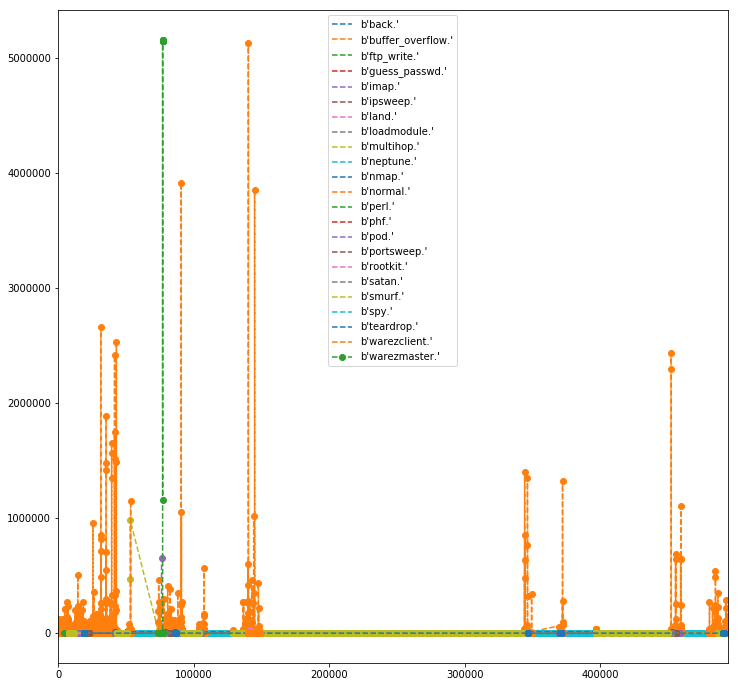

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
width = 12
height = 12
plt.figure(figsize=(width, height))
data_cmb.groupby("target")["dst_bytes"].plot(style='--o', legend=True)

# Reference

1. Analysis and Results of the 1999 DARPA Off-Line Intrusion Detection Evaluation Richard Lippmann, Joshua W. Haines, David J. Fried, Jonathan Korba, Kumar Das
2. K. Yamanishi, J.-I. Takeuchi, G. Williams, and P. Milne. Online unsupervised outlier detection using finite mixtures with discounting learning algorithms. In Proceedings of the sixth ACM SIGKDD international conference on Knowledge discovery and data mining, pages 320-324. ACM Press, 2000.